## Programas para el apartado de optimización

#### Descripción del programa en C:

Se usa exactamente el mismo programa que en el péndulo doble, solo que se ha implementado la librería <omp.h>. En uno de ellos , sinoptimizar.c no se han implementado comandos #pragma, mientras que en optimizadoomp.c sí. 

Se van cambiando los tiempos totales

Cuando N era lo suficiente para que no entrara dentro de L sin colapsar, L aumentaba.

#### Descripción del programa en python:


En el programa X.1 se presentan los tiempos de ejecución del programa sinoptimizar.c tanto si cambiamos el tiempo total como el paso, para ver si afecta de manera distinta al tiempo de ejecución.

En el programa X.2 se presentan los tiempos de ejecución del programa sinoptimizar.c como del optimizadoomp.c (sin paralelizar) tanto para mi ordenador como para JOEL siguiendo los distintos algoritmos de optimizar a la hora de compilar: O1, O2, O3 y ofast.

En el programa X.3 se cambian los hilos tanto de mi ordenador como de JOEL, y se observan los tiempos de ejecución.

Por último, en X.4 se cambian tanto los hilos como los cores de JOEL y vemos cuál es el mejor.


#### Aclaraciones:

Uso las siguientes definiciones:
- Tiempo de simulación: es la variable del programa en C que define el tiempo total que va a durar la simulación.
- Tiempo de ejecución: es el tiempo que tarda el programa de principio a fin. Dependiendo del paso y tiempo de simulación tardará más o menos. Es el contador desde que el programa empieza hasta que el programa termina.




### Programa 7 plot optimización

En este programa se leerán los ficheros: tiemposSINparalelizar.txt, tiempo_TMAX_fijo.txt, tiempoCORES.txt y tiempoHILOS.txt.

Se plotean los datos según su tiempo total y si pertenece a Joel o a mi pc.

El procesador de mi portátil es un intel i5 12450 H, con 8 cores y 12 hilos.

También cuento con una gráfica nvidia rtx 3050 en el portátil.



### X.1 Comprobación del tiempo de3 ejecución con el de simulación y el paso.

Para ello usaremos el fichero tiempo_TMAX_fijo.txt. En este fichero se recopilan los datos tanto al modificar el paso como al modificar el tiempo total de simulación. 

El objetivo de esto es asegurar que no exista dependencia real de cambiar un parámetro u otro, ya que en teoría solo estamos cambiando el número de pasos totales. Por ello, no debe existir variación si este se queda fijo. El número de pasos totales es igual al tiempo de simulación entre el paso. Lo pondremos fijo (por ejemplo 100s y paso 0.1s tienen los mismos pasos que 10s y paso 0.01s)

En resumen: vamos a ver el comportamiento del tiempo de ejecución a un número fijo de pasos. Para ello pondremos configuraciones como el ejemplo anterior.

Las curvas ploteadas tienen varios algoritmos de optimización. El algoritmo 'sin optimización' es usando sinoptimizar.c. El 'OpenMP' indica que solo ha sido compilado con openmp y que este se encargue. Si pone 'o1', 'o2', 'o3', u 'ofast' esto es que se ha usado dicho algoritmo a la hora de compilar el programa.

C:\Users\diego\AppData\Local\Temp\ipykernel_28248\3423639848.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, skiprows=2)


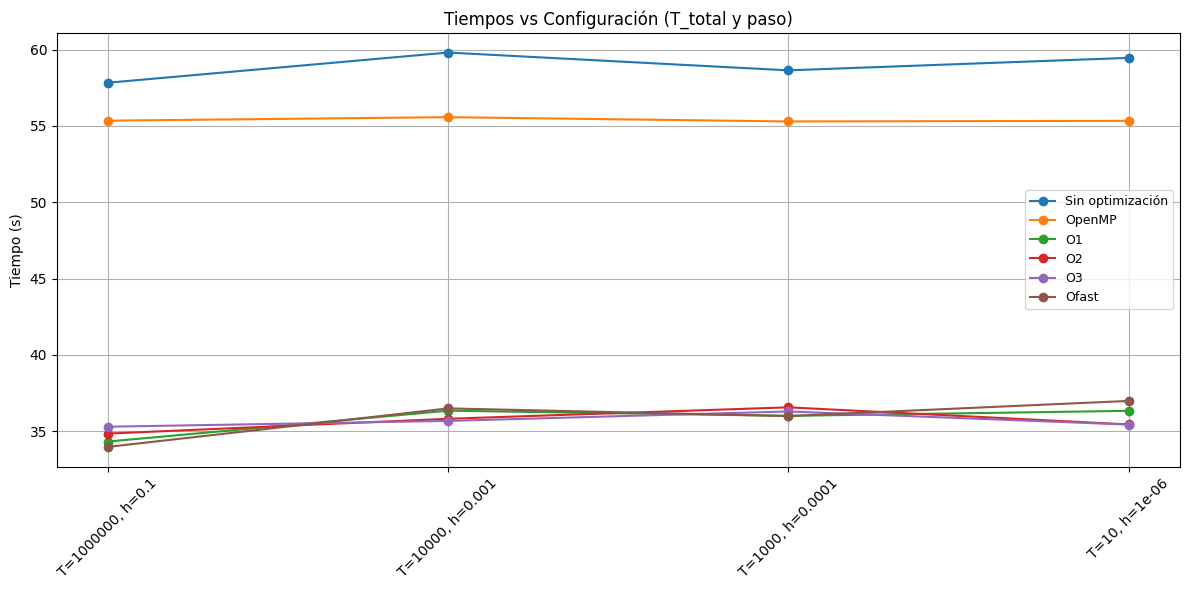

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Nombre del archivo
filename = "tiempo_TMAX_fijo.txt"

# Saltar las dos primeras filas, usar la tercera como cabecera
df = pd.read_csv(filename, delim_whitespace=True, skiprows=2)

# Renombra las columnas aquí según prefieras
nombres_columnas = [
    "T_total", "paso", "Sin optimización", "OpenMP", "O1", "O2", "O3", "Ofast"
]
df.columns = nombres_columnas

# Etiquetas para el eje X combinando la primera y segunda columna
x_labels = [f"T={T}, h={h}" for T, h in zip(df["T_total"], df["paso"])]

# Lista de columnas de datos (todas excepto las dos primeras)
data_columns = nombres_columnas[2:]

plt.figure(figsize=(12, 6))
for col in data_columns:
    plt.plot(x_labels, df[col], marker='o', label=col)

plt.xticks(rotation=45)
plt.ylabel("Tiempo (s)")
plt.title("Tiempos vs Configuración (T_total y paso)")
plt.legend(fontsize=9)
plt.tight_layout()
plt.grid(True)
plt.savefig("tiempos_Numero_de_pasos_fijo.png")
plt.show()

En este ploteo podemos observar como efectivamente, el tiempo de ejecución es constante, por lo que para aumentar la simulación podemos tanto aumentar el tiempo de simulación como reducir el paso, que obtendremos resultados similares.

#### X.2 Tiempo sin paralelizar

Ahora se cogen los datos de tiemposSINparalelizar.txt y se plotean según que algoritmo se haya usado. La leyenda se lee así:

Si lo ha realizado mi portátil lleva PC delante, y si lo hace JOEL, llevará JOEL.

A continuación se dice el algoritmo usado. El algoritmo 'sin' es usando sinoptimizar.c. El 'omp' indica que solo ha sido compilado con openmp y que este se encargue. Si pone 'o1', 'o2', 'o3', u 'ofast' esto es que se ha usado dicho algoritmo a la hora de compilar el programa.


Necesita:

- tiemposSINparalelizar.txt
- Modificar el tiempo total y el paso si es necesario en el título y el nombre del png.

Suelta:

- Gráfica con los tiempos sin paralelizar con los tiempos de optimización tanto en joel como en mi ordenador.


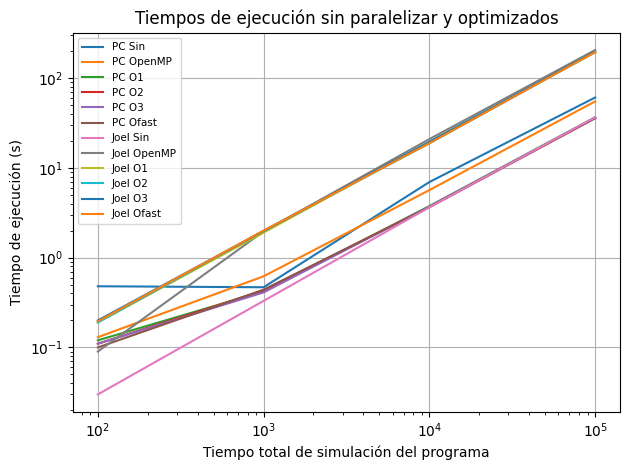

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Ruta al archivo
filename = "tiemposSINparalelizar.txt"

# Leer el archivo y extraer las líneas útiles
with open(filename, "r", encoding="utf-8") as f:
    lines = f.readlines()

# La fila 5 (índice 4) tiene los nombres de las curvas
header = lines[4].strip().split(',')
header = [h.strip() for h in header]

# Comprobar que hay 13 columnas (1 X + 12 curvas)
if len(header) != 13:
    raise ValueError(f"Se esperaban 13 columnas (1 X + 12 curvas), pero se encontraron {len(header)}.")

# Puedes modificar los nombres aquí si quieres
nombres_modificados = [
    "Tiempo total de simulación del programa", "PC Sin", "PC OpenMP", "PC O1", "PC O2", "PC O3", "PC Ofast",
    "Joel Sin", "Joel OpenMP", "Joel O1", "Joel O2", "Joel O3", "Joel Ofast"
]

# Leer los datos a partir de la fila 6 (índice 5)
data = []
for line in lines[5:]:
    if line.strip() == "":
        continue
    # Separar por espacios y/o tabulaciones
    row = [float(x) for x in line.strip().split()]
    if len(row) == 0:
        continue
    if len(row) != 13:
        raise ValueError(f"Se esperaban 13 valores por fila, pero se encontraron {len(row)} en la fila: {line}")
    data.append(row)

data = np.array(data)

# Primer columna: eje X
x = data[:, 0]

# Graficar cada curva
for i, label in enumerate(nombres_modificados[1:], start=1):
    plt.plot(x, data[:, i], label=label)

plt.xlabel(nombres_modificados[0])
plt.ylabel("Tiempo de ejecución (s)")
plt.title("Tiempos de ejecución sin paralelizar y optimizados")
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=7.5)
plt.grid(True)
plt.tight_layout()
plt.savefig("Tiempos_Sin_Paralelizar.png")
plt.show()

Podemos observar en el anterior Ploteo que los tiempos más rápidos constituyen a los algoritmos O1, O2, O3 y Ofast en mi ordenador, con todos un tiempo muy similar al de Joel sin usar ninguna optimización.

Este resultado es interesante, pues significa que Joel sin usar comandos pragma ha resultado ser más eficiente que mi ordenador usando estos comandos. Se lo podemos achacar a que no se distribuye bien la información en mi ordenador usando estos comandos o que no fueron implementados de la mejor forma posible. Por parte de Joel, no es una coincidencia ni problemas del servidor, pues los datos se tomaron dos días diferentes.

#### X.3 Tiempo paralelizando

Para ello usaremos el archivo tiempoHILOS.txt. En este se muestra el tiempo que tarda según el número de hilos en realizar la simulación. Se usará siempre el archivo optimizadoomp.c. 

Se usarán el siguiente número de hilos: 1, 2, 4, 8 y 12, tanto en joel como en mi ordenador. Por eso tienen las etiquetas por ejemplo "pc 2", que indica que lo ha hecho mi ordenador y usando dos hilos. El algoritmo "Mi pc", es usando visualestudio, sin especificar ningún hilo. 

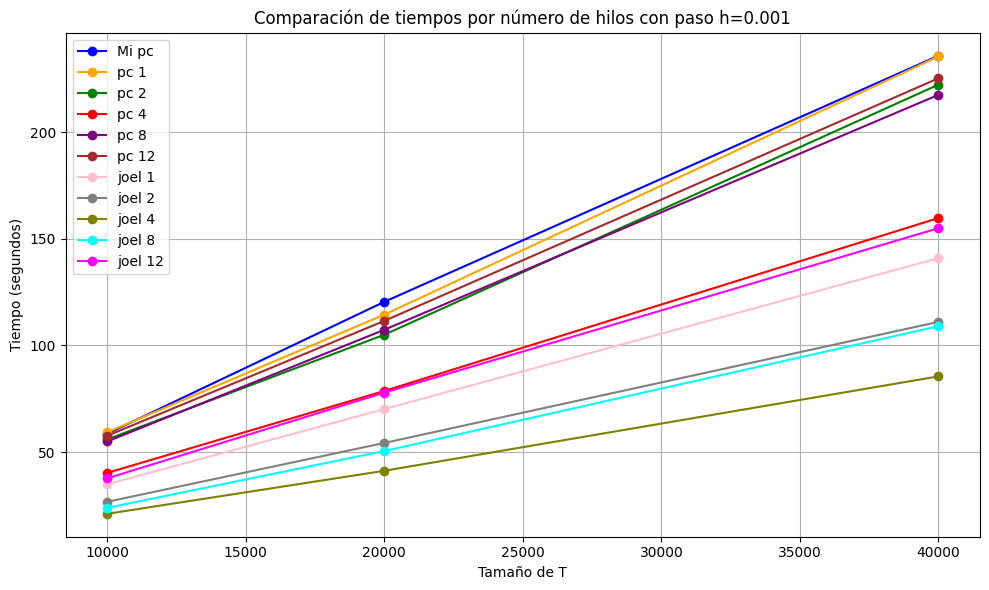

In [34]:
import matplotlib.pyplot as plt

# Configura los nombres y colores de las curvas aquí
curve_names = [
    "Mi pc", "pc 1", "pc 2", "pc 4", "pc 8", "pc 12",
    "joel 1", "joel 2", "joel 4", "joel 8", "joel 12"
]
curve_colors = [
    "blue", "orange", "green", "red", "purple", "brown",
    "pink", "gray", "olive", "cyan", "magenta"
]

filename = "tiempoHILOS.txt"
x = []
ys = [[] for _ in curve_names]

with open(filename, "r", encoding="utf-8") as f:
    data_started = False
    for line in f:
        parts = line.strip().split()
        if not parts:
            continue
        # Detecta si la primera columna es un número
        try:
            xval = float(parts[0])
            data_started = True
        except ValueError:
            continue
        if data_started:
            x.append(xval)
            for i in range(len(curve_names)):
                if i + 1 < len(parts):
                    ys[i].append(float(parts[i + 1]))
                else:
                    ys[i].append(float('nan'))  # Si faltan datos

# Graficar
plt.figure(figsize=(10, 6))
for i, y in enumerate(ys):
    plt.plot(x, y, label=curve_names[i], color=curve_colors[i % len(curve_colors)], marker='o')

plt.xlabel("Tamaño de T")
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación de tiempos por número de hilos con paso h=0.001")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Tiempo_Paralelizando.png")
plt.show()